<a href="https://colab.research.google.com/github/AkiraNom/data_analysis_notebook/blob/main/EDA_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic EDA

dataset from [kaggle titanic data](https://www.kaggle.com/competitions/titanic/data)

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
df.shape

(891, 12)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Through this project, try to answer following basic questions:
  1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
  2. What deck were the passengers on and how does that relate to their class?
  3. Where did the passengers come from?
  4. Who was alone and who was with family?
  5. What factors helped someone survive the sinking?

## Distribution of Sex

<Axes: xlabel='Sex', ylabel='count'>

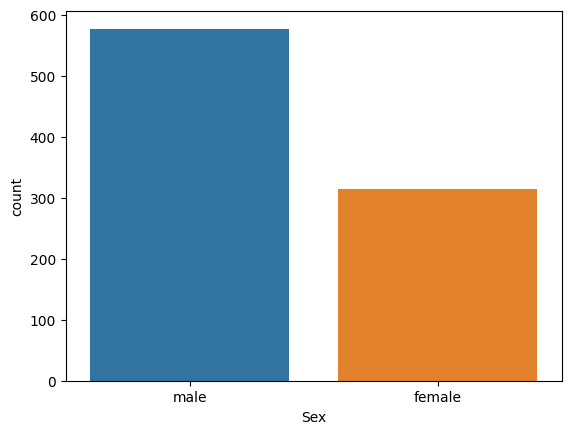

In [228]:
sns.countplot(data=df, x='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

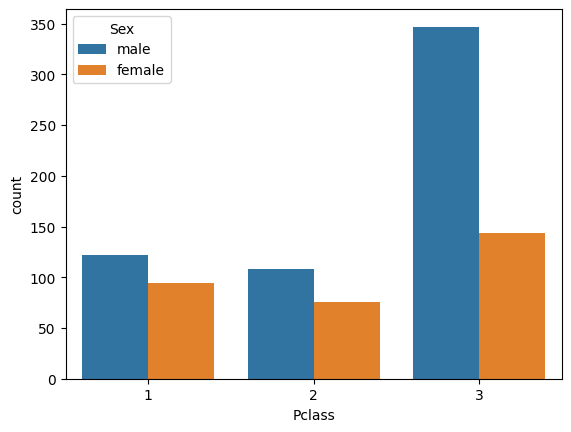

In [229]:
sns.countplot(data=df, x='Pclass',hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

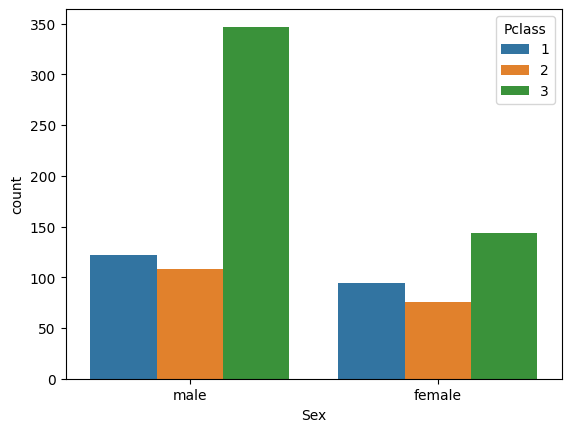

In [230]:
sns.countplot(data=df, x='Sex',hue='Pclass')

In [231]:
# add a column contain three classes [male, female, child]
def male_female_child(passenger):
  '''
  anyone below age of 16, classified as child instead of gender value
  '''
  age, sex = passenger
  if age < 16:
    return 'child'
  else:
    return sex

In [232]:
df.loc[:,'male_female_child'] = df[['Age','Sex']].apply(male_female_child, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_female_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='male_female_child', ylabel='count'>

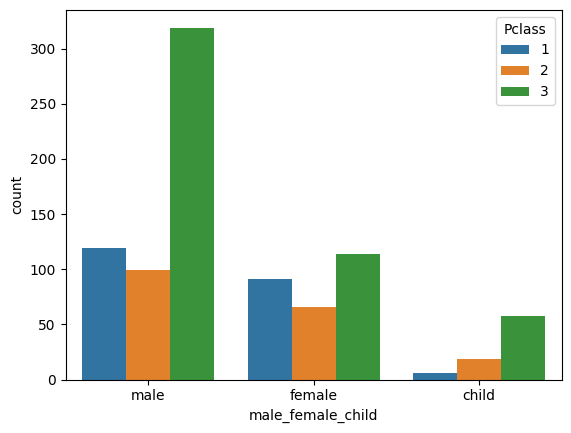

In [233]:
# plot the distribution of male/female/child category with Pclass
sns.countplot(data=df, x='male_female_child',hue='Pclass')

In [234]:
# count each category
df['male_female_child'].value_counts()

male      537
female    271
child      83
Name: male_female_child, dtype: int64

## Distribution of age

<Axes: xlabel='Age', ylabel='Count'>

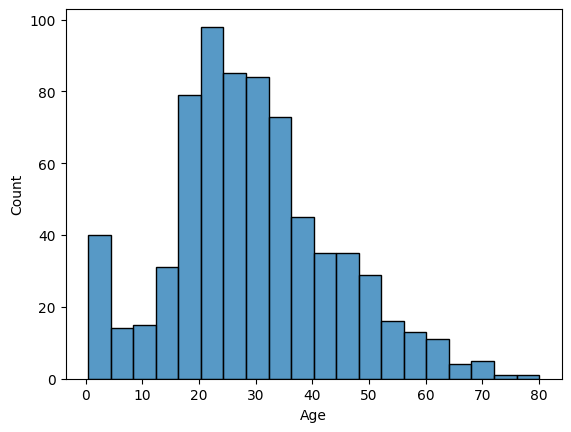

In [235]:
# histogram of age distribution
sns.histplot(data=df, x='Age')

In [236]:
# calculate mean age
df['Age'].mean()

29.69911764705882

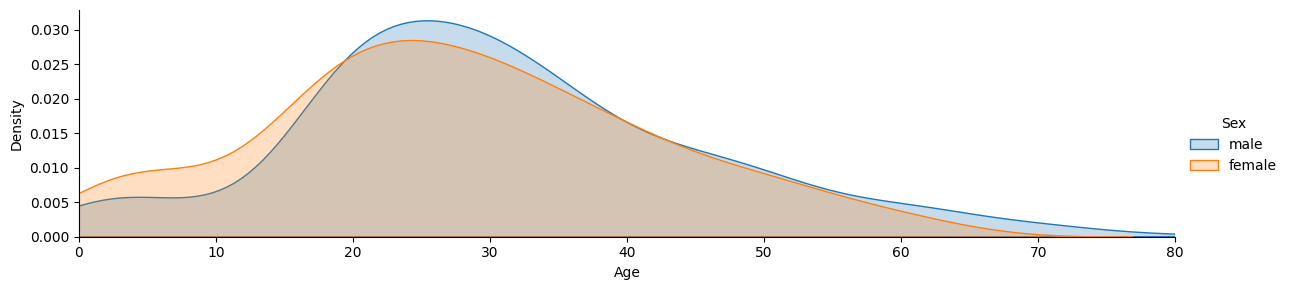

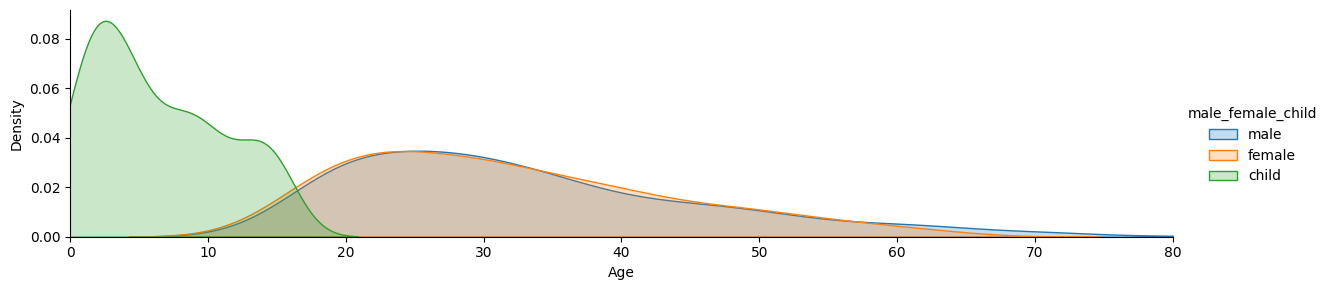

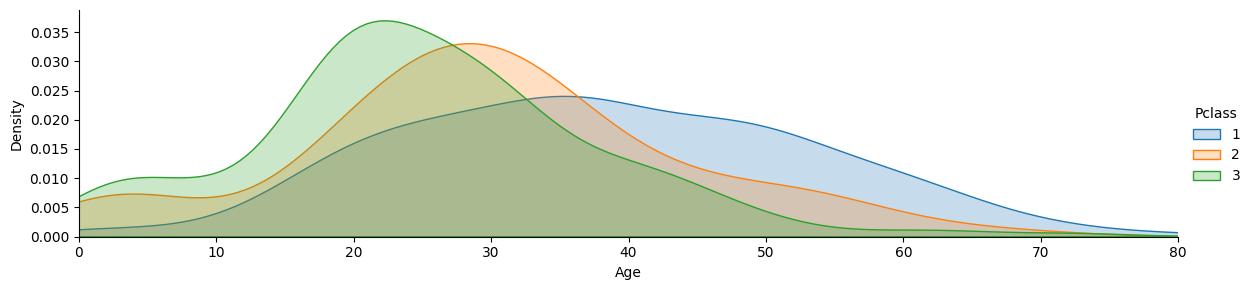

In [237]:
hue_lists = ['Sex','male_female_child','Pclass']
for hue in  hue_lists:
  
  fig = sns.FacetGrid(df, hue=hue,aspect=4)
  # kde plot
  fig.map(sns.kdeplot,'Age',fill= True)

  # Set the x max limit by the oldest passenger
  oldest = df['Age'].max()
  fig.set(xlim=(0,oldest))
  fig.add_legend()

## Distribution of Cabin

In [238]:
# check presence of na in cabin
df.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
male_female_child      0
dtype: int64

In [239]:
# drop off na rows
cabin = df['Cabin'].dropna()
cabin.isna().sum()

0

In [240]:
cabin.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [241]:
# it seems that cabin values hold multiple string,
# the first letter is only needed  
cabin_lists = []

for i in range(len(cabin)):
  # using for-loop, extract the first letter in each value and append to the list
  cabin_lists.append(cabin.iloc[i][0])

# make a dataframe with cabin list 
df_cabin =pd.DataFrame(cabin_lists, columns=['cabin'])
df_cabin.value_counts()

cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
dtype: int64

<Axes: xlabel='cabin', ylabel='count'>

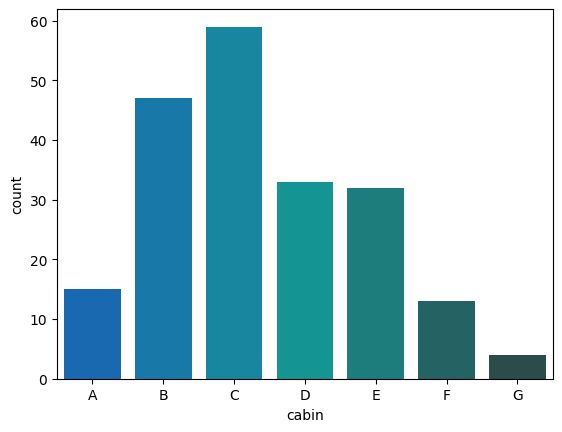

In [242]:
# plot the distribution of cabin
sns.countplot(x=df_cabin['cabin'],order=['A','B','C','D','E','F','G'],palette='winter_d')

## Distribution of embarked

<Axes: xlabel='Embarked', ylabel='count'>

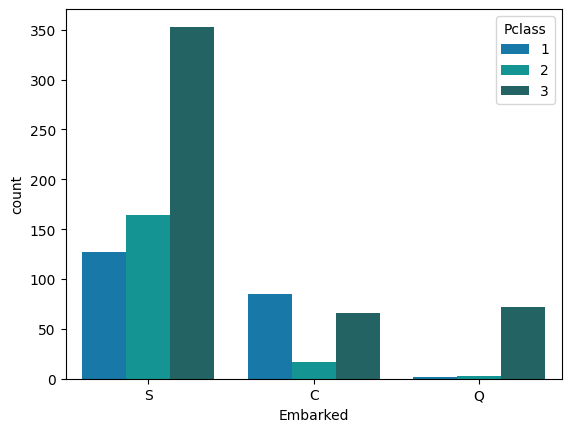

In [243]:
sns.countplot(data=df,x=df['Embarked'],hue='Pclass',palette='winter_d')

In [244]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_female_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


## Distribution of person alone or with family

  * sibsp : # of siblings/spouses aboard <br>
  * parch : # of [aremts children aboard 

In [245]:
df[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [246]:
# if both rows are zero, i.e. sum of cols is zero, 
# a person is alone otherwise a person comes with a family.
df.loc[:,'family']=df[['SibSp','Parch']].sum(axis=1)

<Axes: xlabel='family', ylabel='count'>

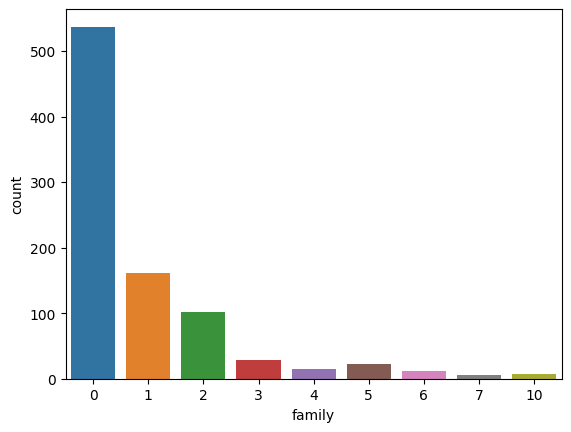

In [247]:
sns.countplot(x=df.family)

In [248]:
df.family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

In [249]:
# add a col representing if a person is alone or not
df.loc[:,'alone'] = np.where(df['family'] >0, 'With family','Alone')

<Axes: xlabel='alone', ylabel='count'>

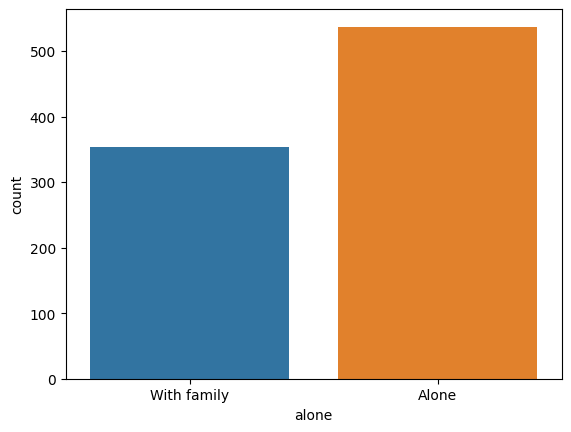

In [250]:
sns.countplot(x=df.alone)

## Distribution of survivors
0 = No, 1 = Yes

<Axes: xlabel='Survived', ylabel='count'>

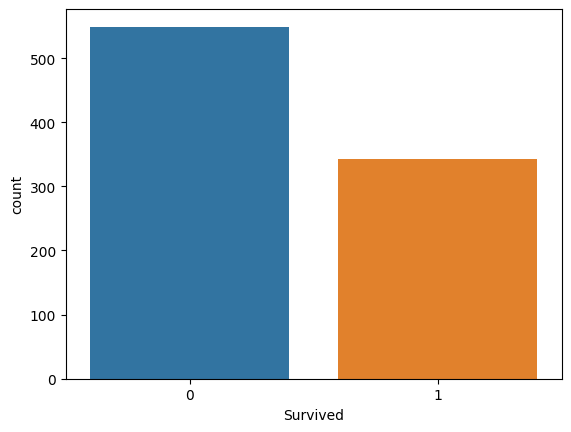

In [251]:
sns.countplot(x=df.Survived)

<Axes: xlabel='Survivor', ylabel='count'>

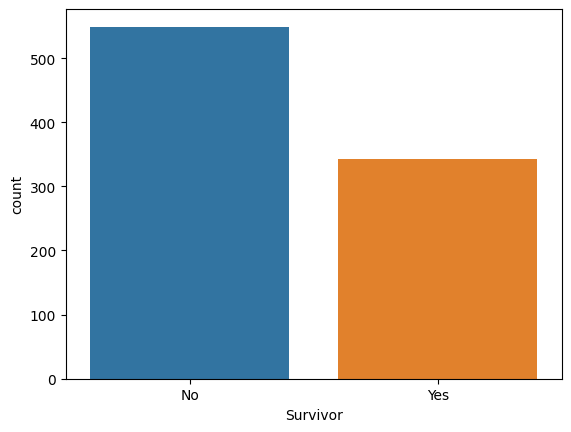

In [252]:
# for visualization/interpretation purpose, change value of survived 
df.loc[:,'Survivor']=df['Survived'].map({0:'No',1:'Yes'})
sns.countplot(x=df.Survivor)

<Axes: xlabel='Survivor', ylabel='count'>

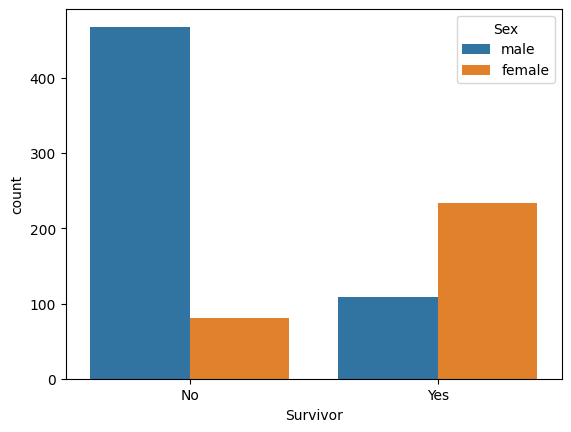

In [253]:
# check if sex affect on the survival rate
sns.countplot(data=df, x=df.Survivor, hue='Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

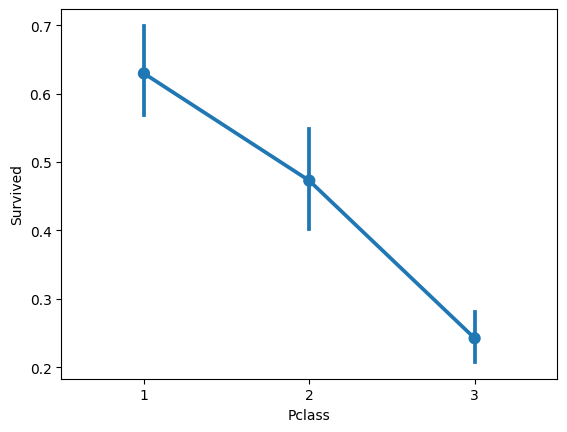

In [255]:
sns.pointplot(data=df,x='Pclass',y='Survived')

<Axes: xlabel='Survivor', ylabel='count'>

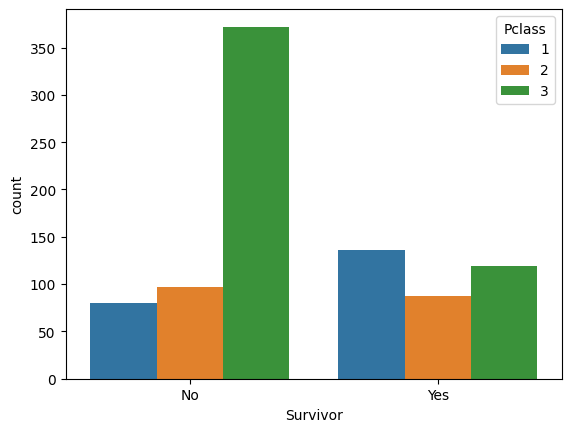

In [254]:
# Does the plcass affect on survial reate
sns.countplot(data=df, x=df.Survivor, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Survived'>

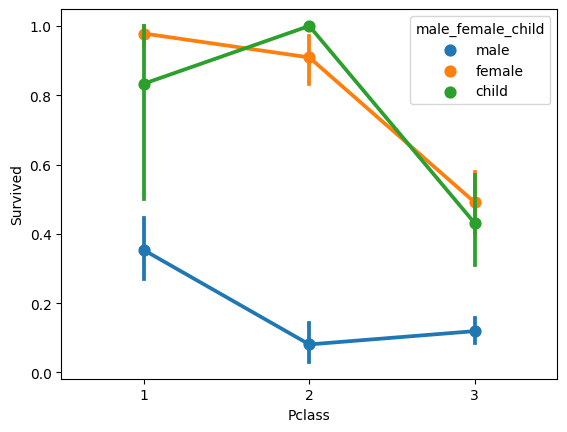

In [256]:
# pointplot
sns.pointplot(data=df,x='Pclass',y='Survived',hue='male_female_child')

### regression plot 

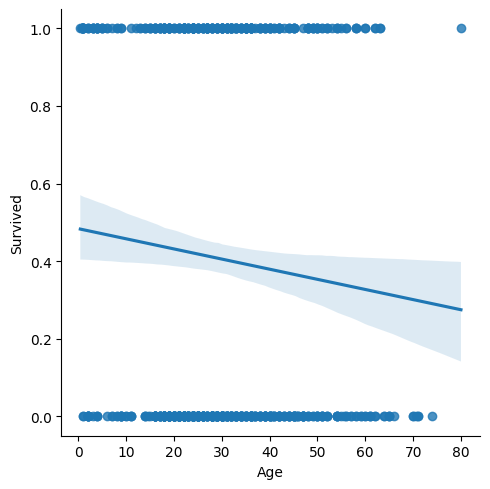

In [259]:
sns.lmplot(data=df,x='Age',y='Survived')

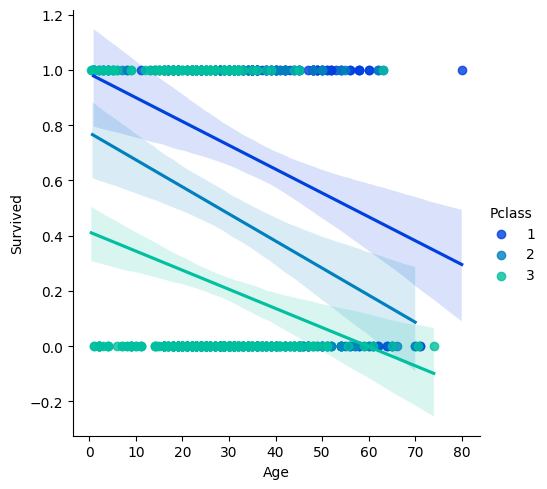

In [260]:
sns.lmplot(data=df,x='Age',y='Survived',hue='Pclass',palette='winter')

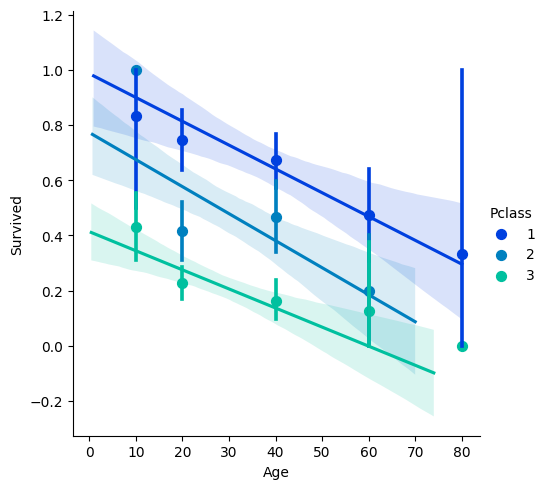

In [262]:
generations=[10,20,40,60,80]
sns.lmplot(data=df,
           x='Age',
           y='Survived',
           hue='Pclass',
           palette='winter',
           x_bins=generations)

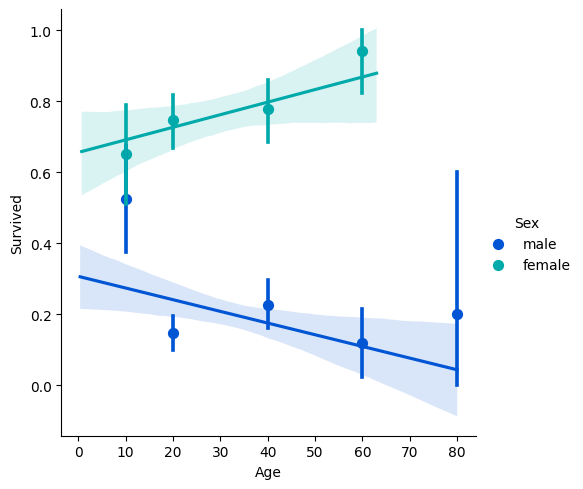

In [263]:
sns.lmplot(data=df,
           x='Age',
           y='Survived',
           hue='Sex',
           palette='winter',
           x_bins=generations)